# Loading the dartaset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5349,"Muslim Pro - Prayer Times, Azan, Quran & Qibla",LIFESTYLE,4.7,1133393,Varies with device,"10,000,000+",Free,0,Everyone,Lifestyle,"July 3, 2018",Varies with device,Varies with device
4587,Tinder,LIFESTYLE,4.0,2789775,68M,"100,000,000+",Free,0,Mature 17+,Lifestyle,"August 2, 2018",9.5.0,4.4 and up
1781,Trivia Crack,GAME,4.5,6427773,95M,"100,000,000+",Free,0,Everyone,Trivia,"August 3, 2018",2.79.0,4.1 and up
7704,ClanPlay: Community and Tools for Gamers,COMMUNICATION,4.8,34443,27M,"1,000,000+",Free,0,Teen,Communication,"June 28, 2018",1.14.3,5.0 and up
7566,Inches to cm conversion,TOOLS,4.4,29,70k,"10,000+",Free,0,Everyone,Tools,"January 14, 2015",1.4,4.0 and up
1327,Pocket Yoga,HEALTH_AND_FITNESS,4.4,2107,Varies with device,"100,000+",Paid,$2.99,Everyone,Health & Fitness,"December 22, 2015",Varies with device,Varies with device
6209,Remix Second Hand,SHOPPING,4.2,867,7.5M,"100,000+",Free,0,Everyone,Shopping,"August 2, 2018",1.5.8,4.4 and up
2572,Facebook Local,SOCIAL,4.2,4751,Varies with device,"1,000,000+",Free,0,Teen,Social,"June 30, 2018",13.0,4.1 and up
10792,Soccer Clubs Logo Quiz,GAME,4.2,21661,16M,"1,000,000+",Free,0,Everyone,Trivia,"May 24, 2018",1.3.81,4.0 and up
6397,BkEmu - BK-0010/11M emulator,FAMILY,4.6,222,1.4M,"10,000+",Free,0,Everyone,Entertainment,"February 7, 2016",0.4.0,2.1 and up


**Apps dataset columns descriptions**

This file contains all the details of the apps on Google Play. There are 9 features that describe a given app.
<ul>
    <li><b>App:</b> Name of the app</li>
    <li><b>Category:</b> Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.</li>
    <li><b>Rating:</b> The current average rating (out of 5) of the app on Google Play</li>
    <li><b>Reviews:</b> Number of user reviews given on the app</li>
    <li><b>Size:</b> Size of the app in MB (megabytes)</li>
    <li><b>Installs:</b> Number of times the app was downloaded from Google Play</li>
    <li><b>Type:</b> Whether the app is paid or free</li>
    <li><b>Price:</b> Price of the app in US$</li>
    <li><b>Last Updated:</b> Date on which the app was last updated on Google Play</li>
</ul> 

In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             10841 non-null  object 
 1   category        10841 non-null  object 
 2   rating          9367 non-null   float64
 3   reviews         10841 non-null  object 
 4   size            10841 non-null  object 
 5   installs        10841 non-null  object 
 6   type            10840 non-null  object 
 7   price           10841 non-null  object 
 8   content_rating  10840 non-null  object 
 9   genres          10841 non-null  object 
 10  last_updated    10841 non-null  object 
 11  current_ver     10833 non-null  object 
 12  android_ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.shape

(10841, 13)

In [7]:
df.isnull().sum()

app                  0
category             0
rating            1474
reviews              0
size                 0
installs             0
type                 1
price                0
content_rating       1
genres               0
last_updated         0
current_ver          8
android_ver          3
dtype: int64

<Axes: >

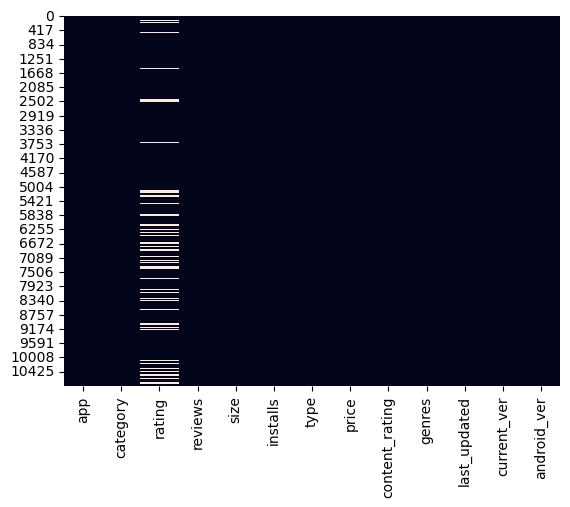

In [8]:
sns.heatmap(df.isnull(), cbar=False)

In [9]:
# Display descriptive statistics for numerical columns
df.describe()

,rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Currently, only the 'Rating'column is recognized as numeric.  
All other numeric-looking columns are stored as objects and require preprocessing (type conversion/cleaning).  
Since there is only one numeric column at the moment, a correlation heatmap cannot be generated.


## Figure and Axes
![Figure and Axes](fig_map.png)
This image shows the difference between a **Figure** (the whole container) and **Axes** (the area where the data is plotted).

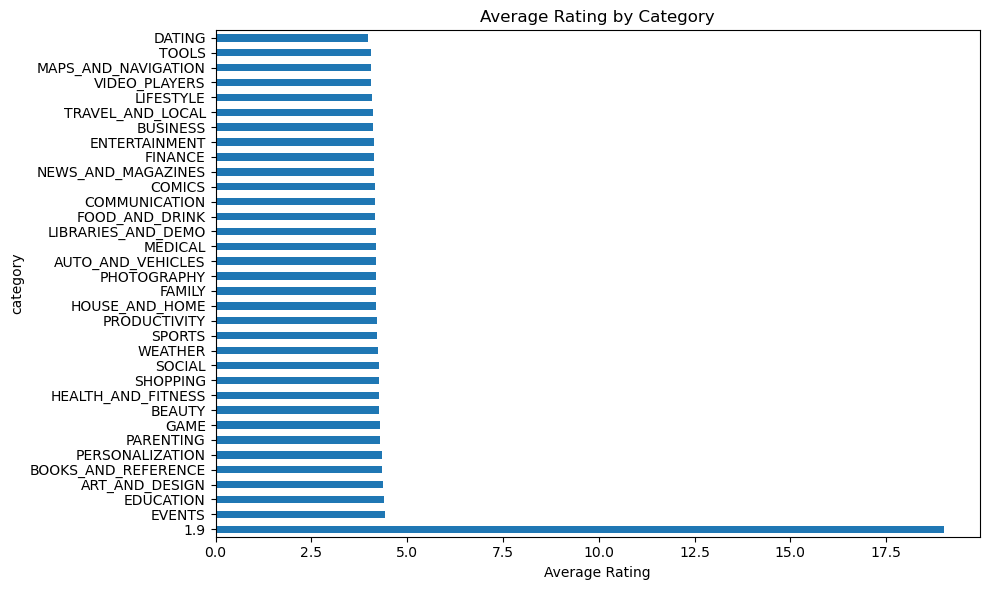

In [10]:
# Group by category and calculate mean rating, then sort
category_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)

# plt.figure(figsize=(width, height))
plt.figure(figsize=(10, 6))
category_rating.plot(kind='barh')
plt.title('Average Rating by Category')
plt.xlabel('Average Rating')
plt.tight_layout() # Optimizes spacing between figure elements so titles, labels, and axes don't overlap
plt.show()

In [11]:
df = df.dropna(subset=['type'])

In [12]:
df['type'].unique()

array(['Free', 'Paid', '0'], dtype=object)

In [13]:
(df['type'] == '0').sum()

1

In [14]:
df = df[df['type'] != '0']

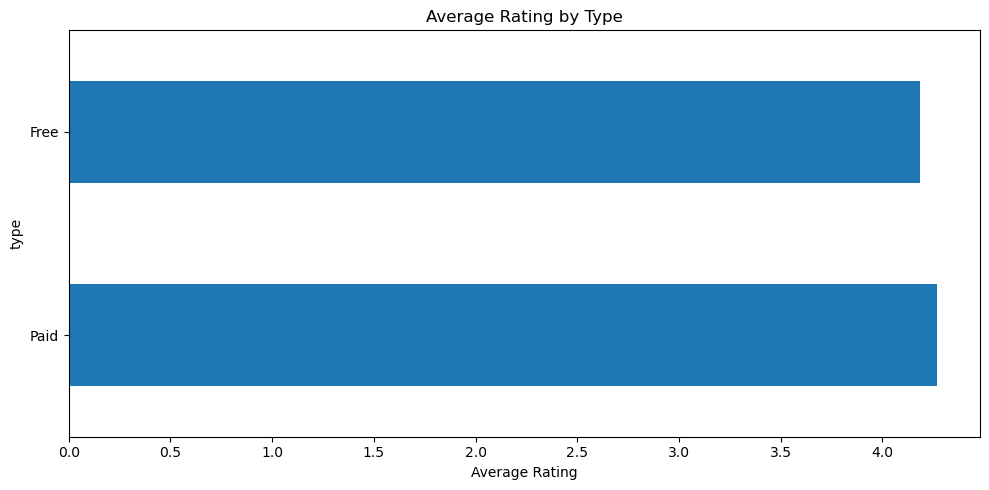

In [15]:
type_rating = df.groupby('type')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
type_rating.plot(kind='barh')
plt.title('Average Rating by Type')
plt.xlabel('Average Rating')
plt.tight_layout()
plt.show()

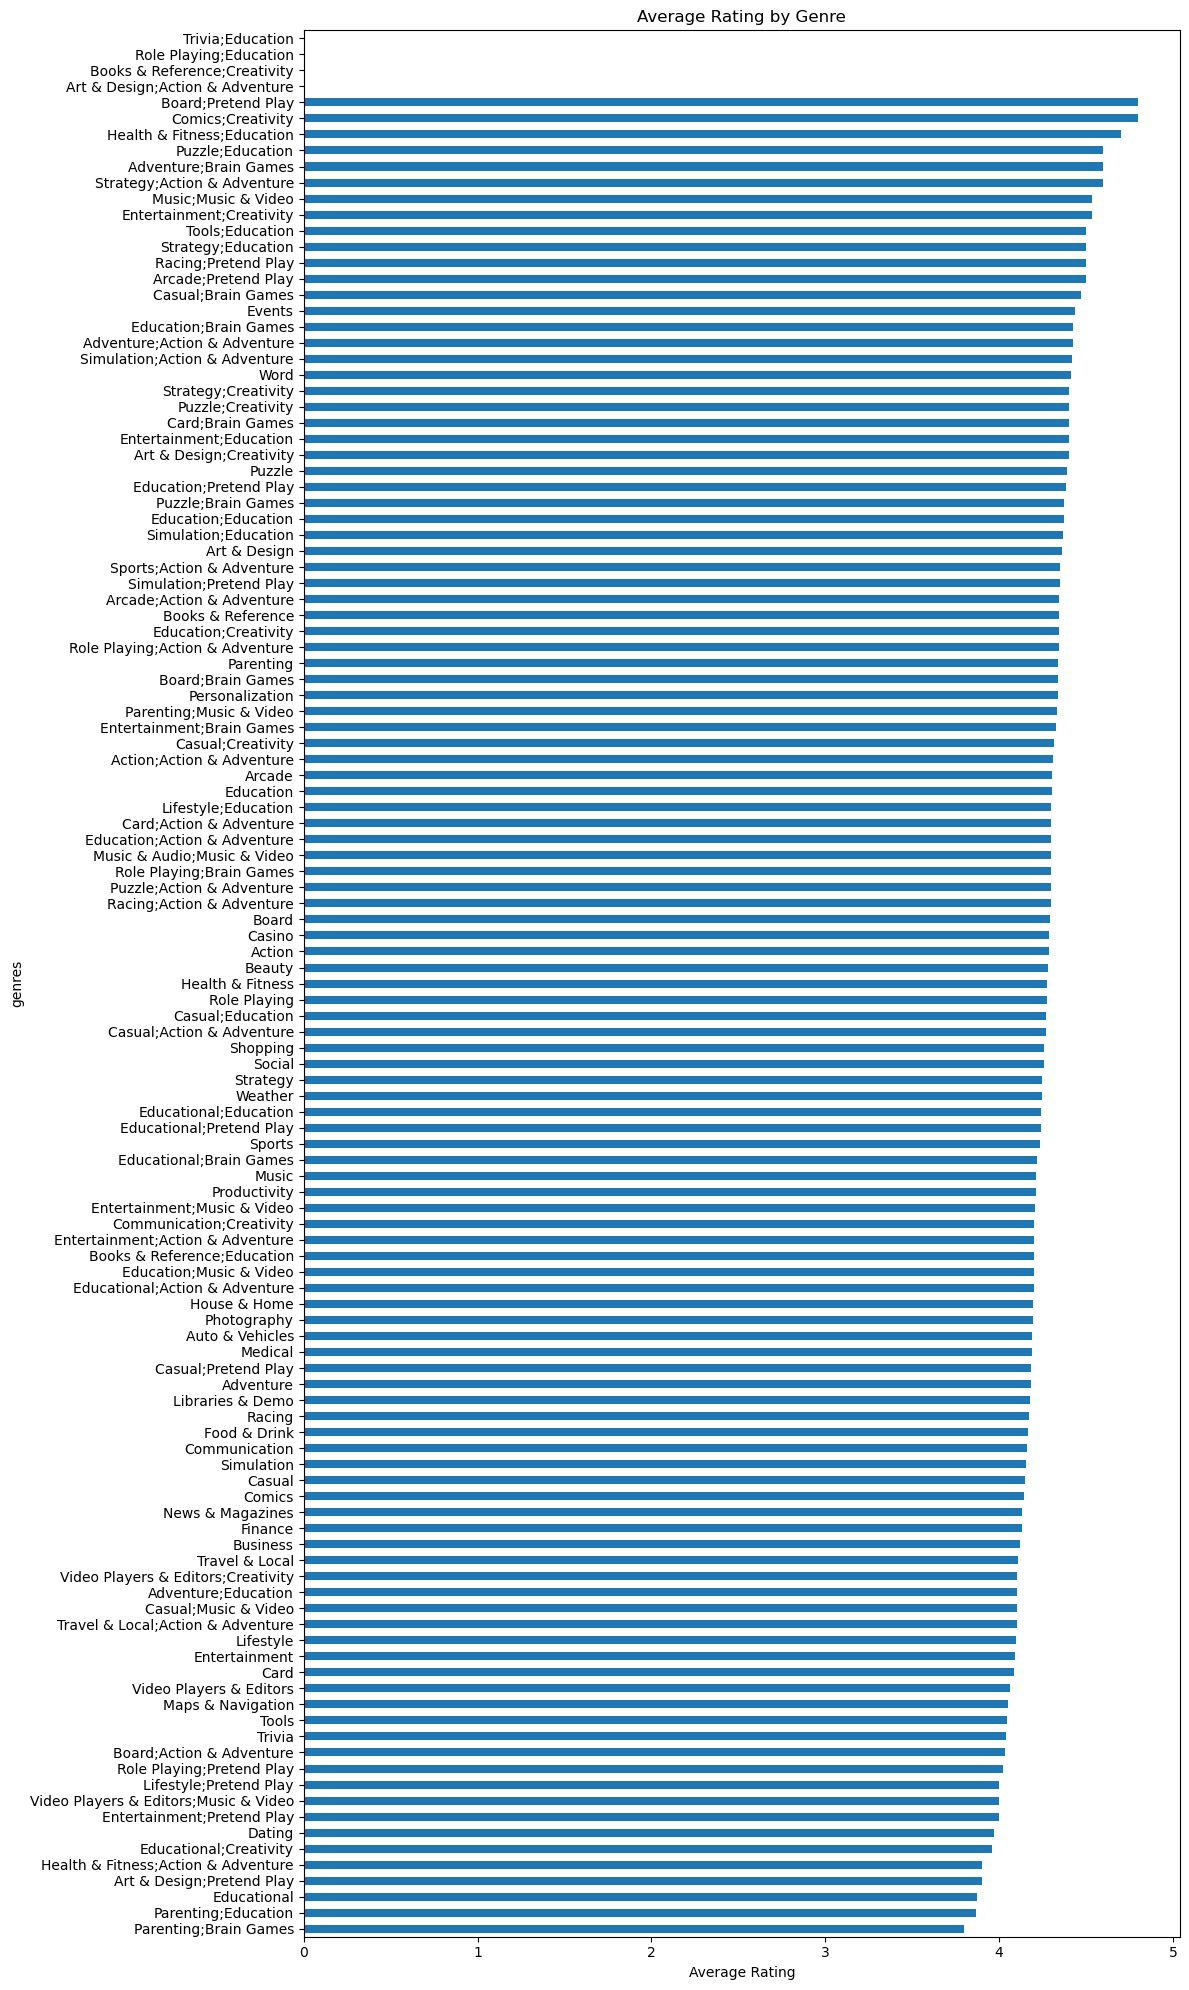

In [16]:
genres_rating = df.groupby('genres')['rating'].mean().sort_values(ascending=True)

plt.figure(figsize=(12, 20))
genres_rating.plot(kind='barh')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.tight_layout()
plt.show()

# Preprocessing

In [17]:
df.shape

(10839, 13)

In [18]:
df.isnull().sum()

app                  0
category             0
rating            1473
reviews              0
size                 0
installs             0
type                 0
price                0
content_rating       0
genres               0
last_updated         0
current_ver          8
android_ver          2
dtype: int64

## app column

Drop 'App' column (high-cardinality text feature) for now. 
Note: It may hold useful ASO (App Store Optimization) signals for future feature engineering  
(e.g., name length, presence of keywords like 'Free/Pro/HD', or semantic features using NLP embeddings).

In [19]:
df = df.drop(columns=['app'])

In [20]:
df

,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## category column

In [21]:
df['category'].describe()

count      10839
unique        33
top       FAMILY
freq        1971
Name: category, dtype: object

In [22]:
df['category'].value_counts()

category
FAMILY                 1971
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

In [23]:
df = df[df['category'] != '1.9']

Text(0.5, 1.0, 'Categories with Their Counts')

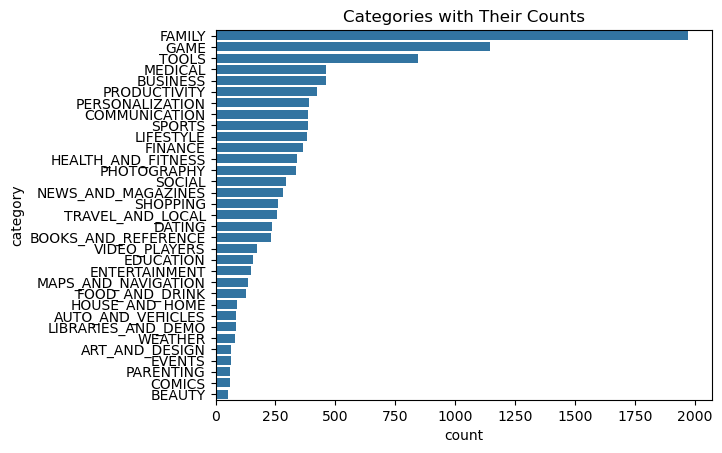

In [24]:
cat_order = df['category'].value_counts().index
sns.countplot(y = "category", data = df, order = cat_order)
plt.title("Categories with Their Counts")

In [25]:
# Since 'category' is a nominal categorical feature (no order), 
# One-Hot Encoding is the suitable choice to represent it numerically.
category_dummies = pd.get_dummies(df['category'], prefix='cat')
df = pd.concat([df, category_dummies], axis=1)
df.drop('category', axis=1, inplace=True)

## rating column

In [26]:
rating_median = df['rating'].median()
df['rating'] = df['rating'].fillna(rating_median)

In [27]:
df.isnull().sum()

rating                     0
reviews                    0
size                       0
installs                   0
type                       0
price                      0
content_rating             0
genres                     0
last_updated               0
current_ver                8
android_ver                2
cat_ART_AND_DESIGN         0
cat_AUTO_AND_VEHICLES      0
cat_BEAUTY                 0
cat_BOOKS_AND_REFERENCE    0
cat_BUSINESS               0
cat_COMICS                 0
cat_COMMUNICATION          0
cat_DATING                 0
cat_EDUCATION              0
cat_ENTERTAINMENT          0
cat_EVENTS                 0
cat_FAMILY                 0
cat_FINANCE                0
cat_FOOD_AND_DRINK         0
cat_GAME                   0
cat_HEALTH_AND_FITNESS     0
cat_HOUSE_AND_HOME         0
cat_LIBRARIES_AND_DEMO     0
cat_LIFESTYLE              0
cat_MAPS_AND_NAVIGATION    0
cat_MEDICAL                0
cat_NEWS_AND_MAGAZINES     0
cat_PARENTING              0
cat_PERSONALIZ

In [28]:
df['rating'].describe()

count    10839.000000
mean         4.206467
std          0.480363
min          1.000000
25%          4.100000
50%          4.300000
75%          4.500000
max          5.000000
Name: rating, dtype: float64

In [29]:
print(df['rating'].dtype)

float64


In [30]:
df["rating"].skew()

-2.0623810506195364

Text(0.5, 1.0, 'Distribution of rating')

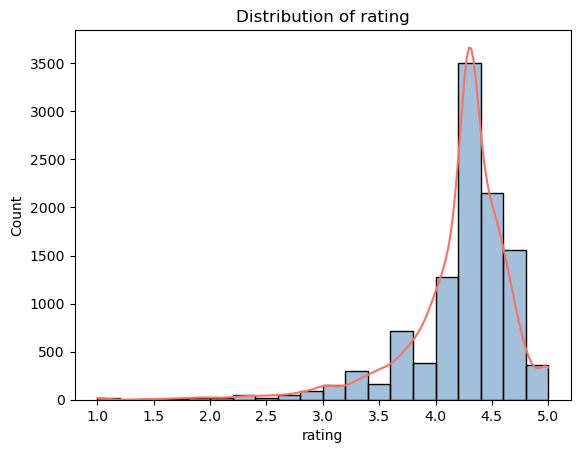

In [31]:
ax = sns.histplot(data=df['rating'], bins=20, kde=True, color='#4682B4')
ax.lines[0].set_color('#FF6F61')
plt.title("Distribution of rating")

In [32]:
# Log transform makes negative skew worse, Yeo-Johnson is a better choice here
from sklearn.preprocessing import PowerTransformer

pt_rating = PowerTransformer(method="yeo-johnson")
df["rating_transformed"] = pt_rating.fit_transform(df[["rating"]])

Text(0.5, 1.0, 'Distribution of ratings (transformed)')

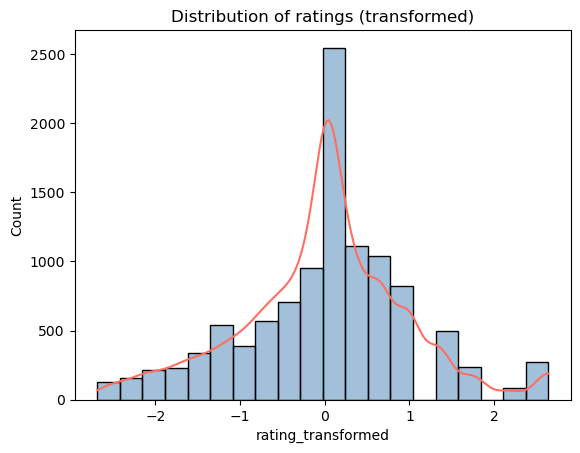

In [33]:
ax = sns.histplot(data=df['rating_transformed'], bins=20, kde=True, color='#4682B4')
ax.lines[0].set_color('#FF6F61')
plt.title("Distribution of ratings (transformed)")

In [34]:
df["rating_transformed"].skew()

-0.0053716227127279205

In [35]:
df = df.drop(columns=["rating"])

## reviews column

In [36]:
df["reviews"]

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: reviews, Length: 10839, dtype: object

In [37]:
df["reviews"].describe()

count     10839
unique     6001
top           0
freq        595
Name: reviews, dtype: object

In [38]:
df["reviews"] = df["reviews"].astype('int64')

In [39]:
df["reviews"].dtype

dtype('int64')

In [40]:
df["reviews"].skew()

16.448836503696477

Text(0.5, 1.0, 'Distribution of reviews')

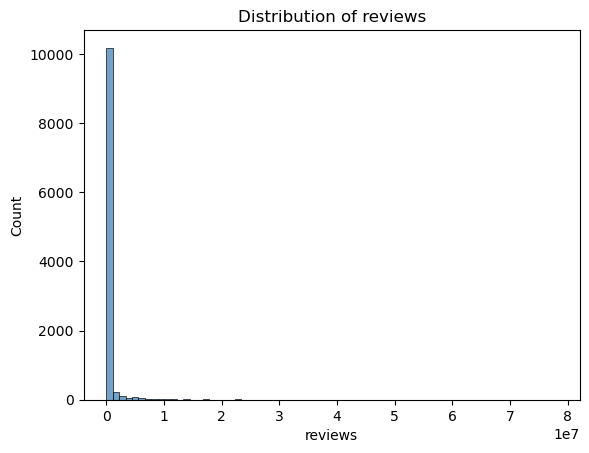

In [41]:
ax = sns.histplot(data=df['reviews'], bins=70, kde=False, color='#4682B4')
# ax.lines[0].set_color('#FF6F61')
plt.title("Distribution of reviews")

In [42]:
df["reviews_log"] = np.log1p(df["reviews"])

In [43]:
df["reviews_log"].skew()

-0.015702039610831067

Text(0.5, 1.0, 'Distribution of reviews (transformed)')

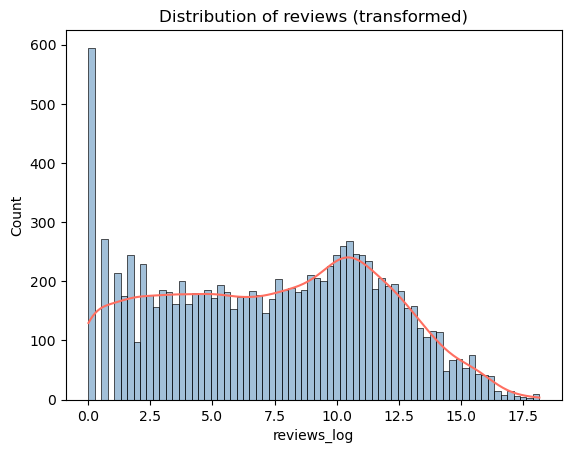

In [44]:
ax = sns.histplot(data=df['reviews_log'], bins=70, kde=True, color='#4682B4')
ax.lines[0].set_color('#FF6F61')
plt.title("Distribution of reviews (transformed)")

In [45]:
df = df.drop(columns=['reviews'])

## size column

In [46]:
df['size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: size, Length: 10839, dtype: object

In [47]:
df['size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [48]:
df['size'].value_counts()

size
Varies with device    1694
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: count, Length: 461, dtype: int64

#### remove K and M, convert to megabytes, replace 'Varies with device' with median

In [49]:
# Operates on string values in a pandas Series (like the size column) and is designed for string manipulation using regular expressions or simple string replacements.
df["size"] = df["size"].str.replace(r'(\d+\.?\d*)[kK]', lambda x: str(float(x.group(1)) / 1000), regex=True)

# df["column"].replace is typically used to replace entire values in a Series (e.g., replacing "10K" with 0.01). 
# However, when regex=True is used with df["column"].replace, it behaves more like a substring replacement.
df["size"] = df["size"].replace("M","", regex=True)

In [50]:
# Using df["size"] = df["size"].astype('float64') -> could not convert string to float: 'Varies with device'

# convert 'Varies with device' to nan
df["size"] = pd.to_numeric(df["size"], errors='coerce').astype('float64')

In [51]:
size_median = df['size'].median()
df['size'] = df['size'].fillna(size_median)

In [52]:
df['size'].unique()

array([1.90e+01, 1.40e+01, 8.70e+00, 2.50e+01, 2.80e+00, 5.60e+00,
       2.90e+01, 3.30e+01, 3.10e+00, 2.80e+01, 1.20e+01, 2.00e+01,
       2.10e+01, 3.70e+01, 2.70e+00, 5.50e+00, 1.70e+01, 3.90e+01,
       3.10e+01, 4.20e+00, 7.00e+00, 2.30e+01, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+01, 2.40e+01, 1.30e+01,
       9.40e+00, 1.50e+01, 1.00e+01, 1.20e+00, 2.60e+01, 8.00e+00,
       7.90e+00, 5.60e+01, 5.70e+01, 3.50e+01, 5.40e+01, 2.01e-01,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+01, 2.50e+00,
       1.60e+01, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+01,
       3.20e+01, 5.40e+00, 1.80e+01, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+01, 9.00e+00, 6.70e+00, 3.00e+01, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+01, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       7.30e+01, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00, 7.20e+00,
       2.10e+00, 4.20e+01, 7.30e+00, 9.10e+00, 5.50e+01, 2.30e

In [53]:
df['size'].skew()

1.820655786330904

Text(0.5, 1.0, 'Distribution of size')

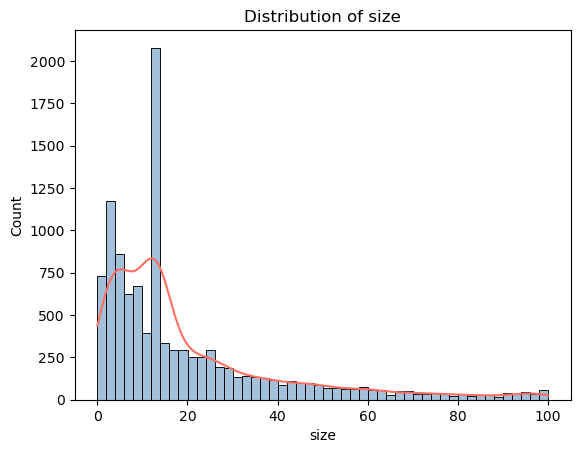

In [54]:
ax = sns.histplot(data=df['size'], bins=50, kde=True, color='#4682B4')
ax.lines[0].set_color('#FF6F61')
plt.title("Distribution of size")

In [55]:
df['size'].skew()

1.820655786330904

In [56]:
# Apply cube root (³√x) transformation to reduce skewness
df["size"] = np.cbrt(df["size"])

In [57]:
df['size'].skew()

0.4075220190959196

Text(0.5, 1.0, 'Distribution of size')

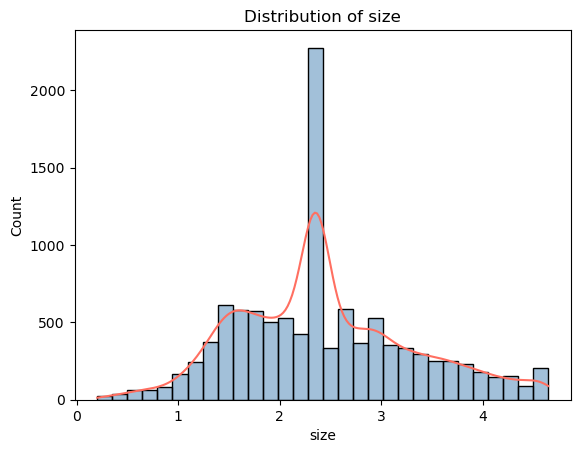

In [58]:
ax = sns.histplot(data=df['size'], bins=30, kde=True, color='#4682B4')
ax.lines[0].set_color('#FF6F61')
plt.title("Distribution of size")

## installs column

In [59]:
df['installs'].value_counts()

installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Name: count, dtype: int64

In [60]:
df['installs'] = df['installs'].replace('0', '0+')

In [61]:
# Use str.replace to remove '+' and ',' inside strings
df['installs'] = df['installs'].str.replace('+', '').str.replace(',', '')

In [62]:
df['installs'].value_counts()

installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               14
Name: count, dtype: int64

In [63]:
df['installs'] = df['installs'].astype('int64')

In [64]:
df['installs'].skew()

9.571619379367249

In [65]:
df['installs'] = np.log1p(df['installs'])

In [66]:
df['installs'].skew()

-0.3032624933275152

## type column

In [67]:
df['type'].describe()

count     10839
unique        2
top        Free
freq      10039
Name: type, dtype: object

In [68]:
df['type'].value_counts()

type
Free    10039
Paid      800
Name: count, dtype: int64

In [69]:
df['is_paid'] = df['type'].apply(lambda x: 1 if x == 'Paid' else 0)

In [70]:
df = df.drop(columns=['type'])

## price column

In [71]:
df['price'].describe()

count     10839
unique       92
top           0
freq      10039
Name: price, dtype: object

In [72]:
df['price'].value_counts()

price
0         10039
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: count, Length: 92, dtype: int64

In [73]:
# Remove $ and convert to float
df['price'] = df['price'].str.replace('$', '', regex=False).astype('float64')

In [74]:
df['price'].describe()

count    10839.000000
mean         1.027463
std         15.950436
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: price, dtype: float64

In [75]:
df['price'].skew()

23.706294949834458

Text(0.5, 1.0, 'Distribution of prices')

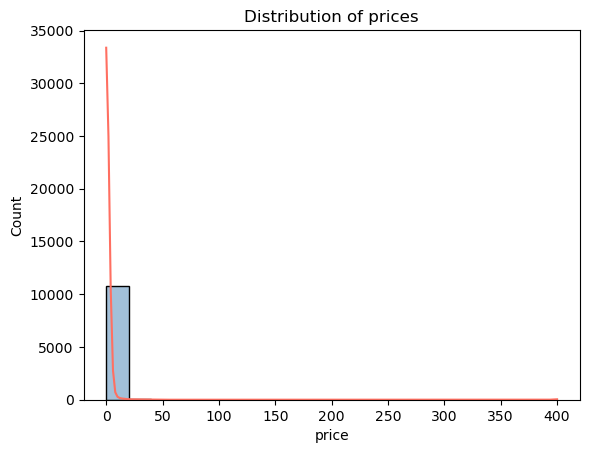

In [76]:
ax = sns.histplot(data=df['price'], bins=20, kde=True, color='#4682B4')
ax.lines[0].set_color('#FF6F61')
plt.title("Distribution of prices")

In [77]:
from scipy.stats import boxcox
df["price_boxcox"], best_lambda = boxcox(df["price"] + 1)  # Automatically selects the optimal λ

Text(0.5, 1.0, 'Distribution of prices (boxcox Transformed)')

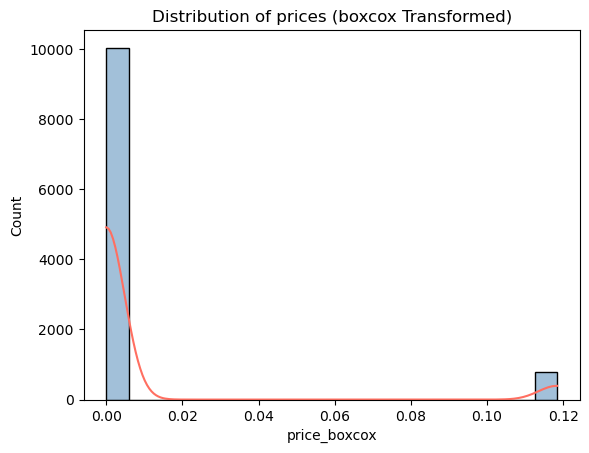

In [78]:
ax = sns.histplot(data=df['price_boxcox'], bins=20, kde=True, color='#4682B4')
ax.lines[0].set_color('#FF6F61')
plt.title("Distribution of prices (boxcox Transformed)")

In [79]:
df['price_boxcox'].skew()

3.260588228078739

In [80]:
# The skewness in the 'price' column is inherent to the data's nature (many zeros and a few large values).
# We're using the Box-Cox transformation to significantly reduce this skewness, but some remains due to the data's natural distribution.
# For better results, it's more effective to use models that are less sensitive to this residual skewness,
# such as tree-based models like Random Forest or XGBoost.

In [81]:
df = df.drop(columns=['price'])

## content_rating column

In [82]:
df['content_rating'].dtype

dtype('O')

In [83]:
df['content_rating'].value_counts()

content_rating
Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [84]:
df['content_rating'] = df['content_rating'].str.lower().str.replace(' ', '_')

In [85]:
# Remove rare content_rating categories: 'Adults only 18+' and 'Unrated'
# Only 5 rows in total, so they don't affect the model much
df = df[~df['content_rating'].isin(['adults_only_18+', 'unrated'])]

In [86]:
df['content_rating'].value_counts()

content_rating
everyone        8714
teen            1208
mature_17+       499
everyone_10+     413
Name: count, dtype: int64

In [87]:
df['content_rating'] = df['content_rating'].replace({
    'mature_17+': 'mature',
    'everyone_10+': 'everyone'
})

In [88]:
df['content_rating'].value_counts()

content_rating
everyone    9127
teen        1208
mature       499
Name: count, dtype: int64

In [89]:
# Note: Ordinal encoding is not used; One-Hot is applied instead
# because the distances between categories are not equal:
# the distance from 'everyone' to 'teen' is not the same as from 'teen' to 'mature'.

ratings_onehot = pd.get_dummies(df['content_rating'], prefix='rating')
df = pd.concat([df, ratings_onehot], axis=1).drop(columns=['content_rating'])

In [90]:
df.sample(5)

,size,installs,genres,last_updated,current_ver,android_ver,cat_ART_AND_DESIGN,cat_AUTO_AND_VEHICLES,cat_BEAUTY,cat_BOOKS_AND_REFERENCE,...,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER,rating_transformed,reviews_log,is_paid,price_boxcox,rating_everyone,rating_mature,rating_teen
3819,2.351335,20.030119,News & Magazines,"August 3, 2018",Varies with device,Varies with device,False,False,False,False,...,False,False,False,0.331182,14.065506,0,0.000000,True,False,False
449,2.351335,18.420681,Communication,"August 1, 2018",Varies with device,Varies with device,False,False,False,False,...,False,False,False,0.645329,15.872222,0,0.000000,True,False,False
8599,3.036589,6.216606,Business,"April 8, 2018",1.0.2,4.1 and up,False,False,False,False,...,False,False,False,0.041461,0.000000,0,0.000000,True,False,False
995,2.351335,11.512935,Entertainment,"June 30, 2018",Varies with device,Varies with device,False,False,False,False,...,False,False,False,0.985462,8.738575,1,0.118379,True,False,False
1195,2.571282,15.424949,Food & Drink,"August 3, 2018",6.0.1,5.0 and up,False,False,False,False,...,False,False,False,0.041461,10.240281,0,0.000000,True,False,False


## genres column

In [91]:
df.genres.dtype

dtype('O')

In [92]:
df.genres.describe()

count     10834
unique      119
top       Tools
freq        841
Name: genres, dtype: object

In [93]:
df['genres'].value_counts()

genres
Tools                                841
Entertainment                        622
Education                            549
Medical                              463
Business                             460
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: count, Length: 119, dtype: int64

Now we aim to identify genres with a small number of apps and consolidate them into a single category labeled "Other".

In [94]:
df['genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [95]:
# For each row, create a list of that row's genres by splitting on ';'
df['genres_listed'] = df['genres'].str.split(';')
df['genres_listed']

0                      [Art & Design]
1        [Art & Design, Pretend Play]
2                      [Art & Design]
3                      [Art & Design]
4          [Art & Design, Creativity]
                     ...             
10836                     [Education]
10837                     [Education]
10838                       [Medical]
10839             [Books & Reference]
10840                     [Lifestyle]
Name: genres_listed, Length: 10834, dtype: object

In [96]:
# Initialize an empty set to store unique genres
unique_genres = set()

for row in df['genres_listed']:
    # Add all genres from each list to the set
    unique_genres.update(row)

# update() takes multiple items from an iterable (e.g., a list from a row) and adds them all, skipping duplicates.
# s = set()
# s.update([1, 2, 2, 3])  -> {'cat', 1, 2, 3}
# add() inserts exactly one item into the set (numbers, strings, tuples, etc. — not lists).
# s.add("cat")          -> {'cat'}
# s.add([1, 2, 3]) -> TypeError: unhashable type: 'list'

# Convert the set to a list and print it
unique_genres_list = sorted(list(unique_genres))
print(unique_genres_list)
print(F"{len(unique_genres_list)} unique geners")

['Action', 'Action & Adventure', 'Adventure', 'Arcade', 'Art & Design', 'Auto & Vehicles', 'Beauty', 'Board', 'Books & Reference', 'Brain Games', 'Business', 'Card', 'Casino', 'Casual', 'Comics', 'Communication', 'Creativity', 'Dating', 'Education', 'Educational', 'Entertainment', 'Events', 'Finance', 'Food & Drink', 'Health & Fitness', 'House & Home', 'Libraries & Demo', 'Lifestyle', 'Maps & Navigation', 'Medical', 'Music', 'Music & Audio', 'Music & Video', 'News & Magazines', 'Parenting', 'Personalization', 'Photography', 'Pretend Play', 'Productivity', 'Puzzle', 'Racing', 'Role Playing', 'Shopping', 'Simulation', 'Social', 'Sports', 'Strategy', 'Tools', 'Travel & Local', 'Trivia', 'Video Players & Editors', 'Weather', 'Word']
53 unique geners


In [97]:
all_individual_genres = df['genres_listed'].explode()
all_individual_genres.head(10)

0    Art & Design
1    Art & Design
1    Pretend Play
2    Art & Design
3    Art & Design
4    Art & Design
4      Creativity
5    Art & Design
6    Art & Design
7    Art & Design
Name: genres_listed, dtype: object

In [98]:
genre_counts = all_individual_genres.value_counts()
genre_counts

genres_listed
Tools                      842
Education                  761
Entertainment              666
Medical                    463
Business                   460
Productivity               424
Sports                     401
Personalization            392
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Dating                     234
Books & Reference          234
Simulation                 218
Video Players & Editors    178
Puzzle                     167
Action & Adventure         138
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                 

In [99]:
rare_genres = genre_counts[genre_counts < 80].index
rare_genres

Index(['Brain Games', 'Art & Design', 'Events', 'Board', 'Parenting', 'Comics',
       'Beauty', 'Card', 'Music & Video', 'Trivia', 'Casino', 'Creativity',
       'Word', 'Music', 'Music & Audio'],
      dtype='object', name='genres_listed')

In [100]:
df['new_genres'] = df['genres_listed'].apply(
    lambda genres: ['Other' if g in rare_genres else g for g in genres]
)

df['new_genres'].head(10)

0                  [Other]
1    [Other, Pretend Play]
2                  [Other]
3                  [Other]
4           [Other, Other]
5                  [Other]
6                  [Other]
7                  [Other]
8                  [Other]
9           [Other, Other]
Name: new_genres, dtype: object

In [101]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# One-hot encode the genres
genres_onehot_array = mlb.fit_transform(df['new_genres'])

# Convert the array to a DataFrame with genre columns
genres_onehot_df = pd.DataFrame(genres_onehot_array, columns=mlb.classes_, index=df.index)
genres_onehot_df = genres_onehot_df.add_prefix('genre_')
df = pd.concat([df, genres_onehot_df], axis=1)

In [102]:
df = df.drop(columns=['genres', 'genres_listed', 'new_genres'])

In [103]:
num_columns = len(df.columns)
print(num_columns)

84


In [104]:
pd.set_option('display.max_columns', None)
df.head(5)

,size,installs,last_updated,current_ver,android_ver,cat_ART_AND_DESIGN,cat_AUTO_AND_VEHICLES,cat_BEAUTY,cat_BOOKS_AND_REFERENCE,cat_BUSINESS,cat_COMICS,cat_COMMUNICATION,cat_DATING,cat_EDUCATION,cat_ENTERTAINMENT,cat_EVENTS,cat_FAMILY,cat_FINANCE,cat_FOOD_AND_DRINK,cat_GAME,cat_HEALTH_AND_FITNESS,cat_HOUSE_AND_HOME,cat_LIBRARIES_AND_DEMO,cat_LIFESTYLE,cat_MAPS_AND_NAVIGATION,cat_MEDICAL,cat_NEWS_AND_MAGAZINES,cat_PARENTING,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER,rating_transformed,reviews_log,is_paid,price_boxcox,rating_everyone,rating_mature,rating_teen,genre_Action,genre_Action & Adventure,genre_Adventure,genre_Arcade,genre_Auto & Vehicles,genre_Books & Reference,genre_Business,genre_Casual,genre_Communication,genre_Dating,genre_Education,genre_Educational,genre_Entertainment,genre_Finance,genre_Food & Drink,genre_Health & Fitness,genre_House & Home,genre_Libraries & Demo,genre_Lifestyle,genre_Maps & Navigation,genre_Medical,genre_News & Magazines,genre_Other,genre_Personalization,genre_Photography,genre_Pretend Play,genre_Productivity,genre_Puzzle,genre_Racing,genre_Role Playing,genre_Shopping,genre_Simulation,genre_Social,genre_Sports,genre_Strategy,genre_Tools,genre_Travel & Local,genre_Video Players & Editors,genre_Weather
0,2.668402,9.210440,"January 7, 2018",1.0.0,4.0.3 and up,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,-0.470603,5.075174,0,0.0,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.410142,13.122365,"January 15, 2018",2.0.0,4.0.3 and up,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,-0.902022,6.875232,0,0.0,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.056710,15.424949,"August 1, 2018",1.2.4,4.0.3 and up,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.353207,11.379520,0,0.0,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.924018,17.727534,"June 8, 2018",Varies with device,4.2 and up,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.645329,12.281389,0,0.0,False,False,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.409460,11.512935,"June 20, 2018",1.1,4.4 and up,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.041461,6.875232,0,0.0,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
pd.reset_option('display.max_columns')

#### Feature extraction from `last_update`

Since we do not have access to the exact data collection date, we cannot directly compute how old each app’s last update is relative to the collection time. To address this:

1. Find the **most recent date** in the `last_update` column.  
2. Use this date as the **reference point**.  
3. For each app, calculate the time difference between its `last_update` and this reference date, measured in **days**.  
4. Store this value in a new column and use it as a numerical feature for model training.  

This way, the model can learn from the "recency of the last update" as a meaningful signal.

## last_update column

In [106]:
df['last_updated'].describe()

count              10834
unique              1376
top       August 3, 2018
freq                 325
Name: last_updated, dtype: object

In [107]:
# Count how many values of each data type exist in the 'last_updated' column
df["last_updated"].apply(type).value_counts()

last_updated
<class 'str'>    10834
Name: count, dtype: int64

In [108]:
df["last_updated"].dtype

dtype('O')

In [109]:
df["last_updated"] = pd.to_datetime(df["last_updated"])

In [110]:
print(df["last_updated"].dtype)

datetime64[ns]


In [111]:
reference_date = df['last_updated'].max()
# Calculate days since last update for each app
df['days_since_last_update'] = (reference_date - df['last_updated']).dt.days
df = df.drop(columns=['last_updated'])

In [112]:
df['days_since_last_update']

0         213
1         205
2           7
3          61
4          49
         ... 
10836     379
10837      33
10838     565
10839    1297
10840      14
Name: days_since_last_update, Length: 10834, dtype: int64

## current_ver culumn

In [113]:
df['current_ver'].describe()

count                  10826
unique                  2829
top       Varies with device
freq                    1457
Name: current_ver, dtype: object

In [114]:
df['current_ver'].unique

<bound method Series.unique of 0                     1.0.0
1                     2.0.0
2                     1.2.4
3        Varies with device
4                       1.1
                ...        
10836                  1.48
10837                   1.0
10838                   1.0
10839    Varies with device
10840    Varies with device
Name: current_ver, Length: 10834, dtype: object>

In [115]:
df['current_ver'].dtype

dtype('O')

In [116]:
# The 'current_ver' column isn't dropped because version data is critical for predicting ratings.
# It's being transformed into new numeric features (major, minor, and patch versions) so our model can learn how different types of updates impact user satisfaction. 
# We're also creating a separate feature, 'is_varies', to handle the 'Varies with device' rows.

In [117]:
# Create a binary feature to indicate if the version varies with the device.
df['is_varies'] = np.where(df['current_ver'] == 'Varies with device', 1, 0)
print(df[['current_ver', 'is_varies']].head())

          current_ver  is_varies
0               1.0.0          0
1               2.0.0          0
2               1.2.4          0
3  Varies with device          1
4                 1.1          0


In [118]:
# Replace the 'Varies with device' values with an empty string
df['current_ver'] = df['current_ver'].replace('Varies with device', np.nan)
df['current_ver'] = df['current_ver'].fillna('')

In [119]:
# Split the version string into major, minor, patch
version_split = df['current_ver'].str.split('.', expand=True)

# Assign columns
df['current_ver_major'] = pd.to_numeric(version_split[0], errors='coerce').fillna(0).astype(int)
df['current_ver_minor'] = pd.to_numeric(version_split[1], errors='coerce').fillna(0).astype(int)
df['current_ver_patch'] = pd.to_numeric(version_split[2], errors='coerce').fillna(0).astype(int)
df = df.drop(columns=['current_ver'])

In [120]:
df.head(100)

,size,installs,android_ver,cat_ART_AND_DESIGN,cat_AUTO_AND_VEHICLES,cat_BEAUTY,cat_BOOKS_AND_REFERENCE,cat_BUSINESS,cat_COMICS,cat_COMMUNICATION,...,genre_Strategy,genre_Tools,genre_Travel & Local,genre_Video Players & Editors,genre_Weather,days_since_last_update,is_varies,current_ver_major,current_ver_minor,current_ver_patch
0,2.668402,9.210440,4.0.3 and up,True,False,False,False,False,False,False,...,0,0,0,0,0,213,0,1,0,0
1,2.410142,13.122365,4.0.3 and up,True,False,False,False,False,False,False,...,0,0,0,0,0,205,0,2,0,0
2,2.056710,15.424949,4.0.3 and up,True,False,False,False,False,False,False,...,0,0,0,0,0,7,0,1,2,4
3,2.924018,17.727534,4.2 and up,True,False,False,False,False,False,False,...,0,0,0,0,0,61,1,0,0,0
4,1.409460,11.512935,4.4 and up,True,False,False,False,False,False,False,...,0,0,0,0,0,49,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.410142,13.122365,4.0 and up,False,True,False,False,False,False,False,...,0,0,0,0,0,67,0,2,3,4
96,1.300591,13.122365,4.0.3 and up,False,True,False,False,False,False,False,...,0,0,0,0,0,141,0,1,3,0
97,1.650964,11.512935,4.0 and up,False,True,False,False,False,False,False,...,0,0,0,0,0,109,0,2,17,0
98,2.571282,13.122365,5.0 and up,False,False,True,False,False,False,False,...,0,0,0,0,0,6,0,6,10,1


## android_ver column

In [121]:
df['android_ver'].value_counts()

android_ver
4.1 and up            2450
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1360
4.4 and up             979
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           280
2.2 and up             244
4.3 and up             243
3.0 and up             240
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [122]:
df['android_ver'].isnull().sum()

2

In [123]:
df = df.dropna(subset=['android_ver'])

In [124]:
# Group rare values (less than 50)
threshold = 80
counts = df['android_ver'].value_counts()
rare = counts[counts < threshold].index
df['android_ver'] = df['android_ver'].apply(lambda x: 'Other' if x in rare else x)

In [125]:
df['android_ver'].value_counts()

android_ver
4.1 and up            2450
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1360
4.4 and up             979
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           280
Other                  263
2.2 and up             244
4.3 and up             243
3.0 and up             240
2.1 and up             134
1.6 and up             116
Name: count, dtype: int64

In [126]:
android_ver_other = pd.get_dummies(df['android_ver'])[['Other']]
android_ver_varies = pd.get_dummies(df['android_ver'])[['Varies with device']]

In [127]:
df.loc[df['android_ver'].isin(['Other', 'Varies with device']), 'android_ver'] = np.nan

In [128]:
df['android_ver_other'] = android_ver_other.values
df['android_ver_varies'] = android_ver_varies.values

In [129]:
df['android_ver'].value_counts()

android_ver
4.1 and up      2450
4.0.3 and up    1501
4.0 and up      1375
4.4 and up       979
2.3 and up       652
5.0 and up       601
4.2 and up       394
2.3.3 and up     280
2.2 and up       244
4.3 and up       243
3.0 and up       240
2.1 and up       134
1.6 and up       116
Name: count, dtype: int64

In [130]:
# Extract the first part before space; safe with NaN because str.split() returns NaN for NaN values
df['android_ver'] = df['android_ver'].str.split().str[0]

In [131]:
df['android_ver'].value_counts()

android_ver
4.1      2450
4.0.3    1501
4.0      1375
4.4       979
2.3       652
5.0       601
4.2       394
2.3.3     280
2.2       244
4.3       243
3.0       240
2.1       134
1.6       116
Name: count, dtype: int64

In [132]:
# Split the version string into major, minor, patch
version_split = df['android_ver'].str.split('.', expand=True)

# Assign columns
df['android_ver_major'] = version_split[0].fillna(0).astype(int)
df['android_ver_minor'] = version_split[1].fillna(0).astype(int)
df['android_ver_patch'] = version_split[2].fillna(0).astype(int)
df = df.drop(columns=['android_ver'])

In [133]:
df[['android_ver_major', 'android_ver_minor', 'android_ver_patch', 'android_ver_varies', 'android_ver_other']]


,android_ver_major,android_ver_minor,android_ver_patch,android_ver_varies,android_ver_other
0,4,0,3,False,False
1,4,0,3,False,False
2,4,0,3,False,False
3,4,2,0,False,False
4,4,4,0,False,False
...,...,...,...,...,...
10836,4,1,0,False,False
10837,4,1,0,False,False
10838,2,2,0,False,False
10839,0,0,0,True,False


In [134]:
print(len(df.columns))

91


## Splitting the dataset into training and testing sets


In [135]:
# Separate features (X) from the target variable (y)
X = df.drop('rating_transformed', axis=1) 
y = df['rating_transformed']

In [136]:
from sklearn.model_selection import train_test_split

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling and Avoiding Data Leakage

We want to standardize the numerical features so that they have a mean of 0 and a standard deviation of 1.  
This helps many machine learning models perform better.  

To avoid data leakage, we fit the scaler only on the training data and then use the learned parameters to transform both the training and test sets.

In [137]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Numerical features to scale
scaling_features = ['reviews_log', 'size', 'installs', 'price_boxcox', 'days_since_last_update']

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessor: scale only selected numerical features
preprocessor = ColumnTransformer(
    transformers=[('scaler', StandardScaler(), scaling_features)],
    remainder='passthrough',
    verbose_feature_names_out=False
)

# Fit on training data and transform
x_train_scaled = preprocessor.fit_transform(x_train)

# Transform test data using the same scaler
x_test_scaled = preprocessor.transform(x_test)

# model

In [138]:
!pip install xgboost

In [139]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# --- Define XGBoost model ---
xgb_model = XGBRegressor(random_state=42)

# --- Define randomized parameter distributions ---
param_dist = {
    'n_estimators': np.arange(100, 1001, 50),      # number of trees: 100 to 1000, step 50
    'learning_rate': np.linspace(0.01, 0.3, 30),  # learning rate from 0.01 to 0.3
    'max_depth': np.arange(3, 11),                # tree depth from 3 to 10
    'subsample': np.linspace(0.6, 1.0, 5),        # row subsampling
    'colsample_bytree': np.linspace(0.6, 1.0, 5), # column subsampling
}

# --- Setup RandomizedSearchCV ---
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,            # number of random parameter combinations to try
    scoring='r2',         # scoring metric
    cv=5,                 # 5-fold cross-validation
    verbose=2,            # display progress
    n_jobs=-1,            # use all CPU cores
    random_state=42
)

# --- Fit RandomizedSearchCV on training data ---
random_search.fit(x_train_scaled, y_train)

# --- Get the best model ---
best_xgb = random_search.best_estimator_

# --- Predict on test data ---
y_pred_transformed = best_xgb.predict(x_test_scaled)

# --- Inverse transform predictions and test target to original scale ---
y_pred_original = pt_rating.inverse_transform(y_pred_transformed.reshape(-1, 1))
y_test_original = pt_rating.inverse_transform(y_test.values.reshape(-1, 1))

# --- Evaluate the model ---
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

# --- Print results ---
print("Best parameters found:", random_search.best_params_)
print("RMSE:", round(rmse, 4))
print("MAE: ", round(mae, 4))
print("R²:  ", round(r2, 4))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'subsample': 0.8, 'n_estimators': 250, 'max_depth': 8, 'learning_rate': 0.049999999999999996, 'colsample_bytree': 0.9}
RMSE: 0.454
MAE:  0.2756
R²:   0.1691


<Figure size 1200x800 with 0 Axes>

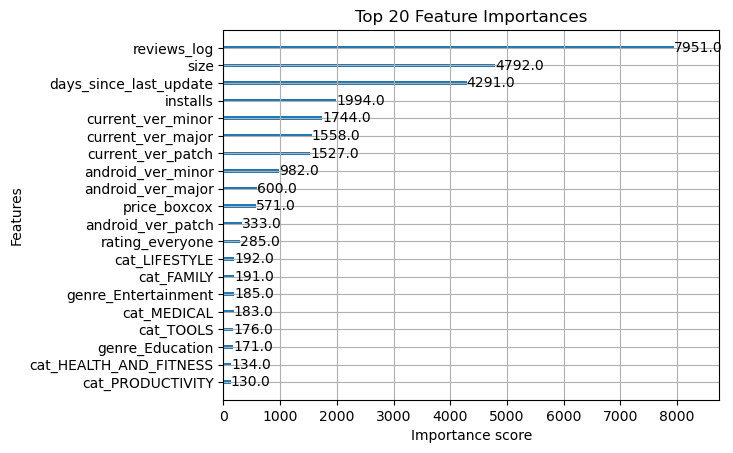

In [140]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Reconstruct feature names after ColumnTransformer
processed_feature_names = scaling_features + [
    col for col in X_train.columns if col not in scaling_features
]

# Assign feature names to the booster
best_xgb.get_booster().feature_names = processed_feature_names

# Plot top 20 feature importances
plt.figure(figsize=(12,8))
plot_importance(best_xgb, max_num_features=20)
plt.title("Top 20 Feature Importances")
plt.show()